# Problem Statement
Use MNIST dataset to create a classifier for all the 10 digits. First implement the classifier by
squeezing the image into a vector and then using a MLP. Now, try the same task using a
different machine learning classifier such as an SVM to check the gain in performance by
using perceptrons as compared to conventional machine learning techniques

Digit recognition system is the working of a machine to train itself for recognizing the digits
from different sources like emails, bank cheque, papers, images, etc. and in different realworld scenarios for online handwriting recognition on computer tablets or system.
Developing such a system includes a machine to understand and classify the images of
handwritten digits as 10 digits (0–9). Handwritten digits from the MNIST database has
been one of the most famous databases among the machine learning community for many
recent decades.

In [1]:
# Importing Libarires 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import cv2
from sklearn.datasets import load_digits
from sklearn import preprocessing 
from collections import Counter 
from skimage.feature import hog
import warnings
warnings.filterwarnings('ignore')

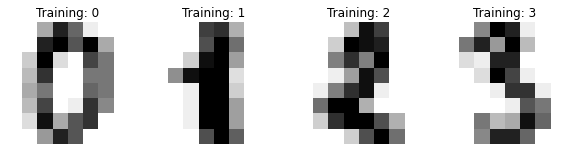

In [2]:
digits =load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

To apply a classifier on this data, we need to flatten the images, turning each 2-D array of grayscale values from shape (8, 8) into shape (64,). Subsequently, the entire dataset will be of shape (n_samples, n_features), where n_samples is the number of images and n_features is the total number of pixels in each image.

We can then split the data into train and test subsets and fit a classifier on the train samples. The fitted classifier can subsequently be used to predict the value of the digit for the samples in the test subset.

In [3]:
n_samples = len(digits.images)

In [4]:
data = digits.images.reshape((n_samples,-1))

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [6]:
# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

In [7]:
Model = MLPClassifier(activation='relu', hidden_layer_sizes=(200, 200), alpha = 0.3)
Model.fit(X_train, y_train)

MLPClassifier(alpha=0.3, hidden_layer_sizes=(200, 200))

In [8]:
print("Training Score :: {}\n".format(Model.score(X_train, y_train)))
print("Testing Score :: {}\n".format(Model.score(X_test, y_test)))

Training Score :: 1.0

Testing Score :: 0.9477196885428254



In [9]:
predicted = Model.predict(X_test)

In [10]:
from sklearn.metrics import confusion_matrix,classification_report,f1_score,plot_confusion_matrix

In [11]:
confusion_matrix(y_test,predicted)

array([[86,  0,  0,  0,  1,  0,  1,  0,  0,  0],
       [ 0, 83,  0,  1,  0,  1,  0,  0,  0,  6],
       [ 0,  0, 85,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 78,  0,  4,  0,  4,  5,  0],
       [ 1,  0,  0,  0, 86,  0,  1,  0,  0,  4],
       [ 0,  0,  0,  0,  0, 87,  1,  0,  0,  3],
       [ 0,  1,  0,  0,  0,  0, 90,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 87,  1,  0],
       [ 0,  4,  0,  0,  0,  2,  1,  0, 81,  0],
       [ 0,  0,  0,  1,  0,  2,  0,  0,  0, 89]], dtype=int64)

In [12]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        88
           1       0.94      0.91      0.93        91
           2       1.00      0.99      0.99        86
           3       0.96      0.86      0.91        91
           4       0.99      0.93      0.96        92
           5       0.90      0.96      0.93        91
           6       0.96      0.99      0.97        91
           7       0.96      0.98      0.97        89
           8       0.93      0.92      0.93        88
           9       0.87      0.97      0.92        92

    accuracy                           0.95       899
   macro avg       0.95      0.95      0.95       899
weighted avg       0.95      0.95      0.95       899



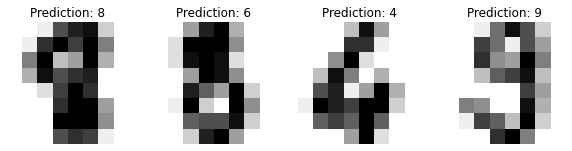

In [13]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

Confusion matrix:
[[86  0  0  0  1  0  1  0  0  0]
 [ 0 83  0  1  0  1  0  0  0  6]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 78  0  4  0  4  5  0]
 [ 1  0  0  0 86  0  1  0  0  4]
 [ 0  0  0  0  0 87  1  0  0  3]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 87  1  0]
 [ 0  4  0  0  0  2  1  0 81  0]
 [ 0  0  0  1  0  2  0  0  0 89]]


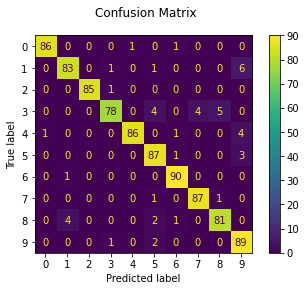

In [14]:
disp = plot_confusion_matrix(Model, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [15]:
from sklearn.svm import SVC

In [16]:
clf = SVC(gamma=0.001)

In [17]:
clf.fit(X_train,y_train)
pred = clf.predict(X_test)

In [20]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



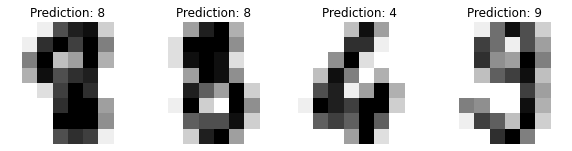

In [23]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, pred):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
clf2 = DecisionTreeClassifier()

In [26]:
clf2.fit(X_train,y_train)
pred2 = clf2.predict(X_test)

In [31]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        88
           1       0.75      0.58      0.65        91
           2       0.87      0.70      0.77        86
           3       0.67      0.76      0.71        91
           4       0.83      0.82      0.82        92
           5       0.59      0.75      0.66        91
           6       0.85      0.93      0.89        91
           7       0.89      0.79      0.83        89
           8       0.63      0.65      0.64        88
           9       0.67      0.71      0.69        92

    accuracy                           0.76       899
   macro avg       0.77      0.76      0.76       899
weighted avg       0.77      0.76      0.76       899



In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
clf3 = RandomForestClassifier()
clf3.fit(X_train,y_train)

RandomForestClassifier()

In [30]:
pred3 = clf3.predict(X_test)

In [32]:
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        88
           1       0.96      0.87      0.91        91
           2       1.00      0.91      0.95        86
           3       0.89      0.88      0.88        91
           4       0.98      0.91      0.94        92
           5       0.90      0.92      0.91        91
           6       0.97      0.99      0.98        91
           7       0.94      0.99      0.96        89
           8       0.91      0.91      0.91        88
           9       0.80      0.92      0.86        92

    accuracy                           0.93       899
   macro avg       0.93      0.93      0.93       899
weighted avg       0.93      0.93      0.93       899



In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
clf4 = LogisticRegression()
clf4.fit(X_train,y_train)
pred4 = clf4.predict(X_test)

In [35]:
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97        88
           1       0.94      0.90      0.92        91
           2       0.99      0.98      0.98        86
           3       0.94      0.84      0.88        91
           4       0.98      0.91      0.94        92
           5       0.88      0.95      0.91        91
           6       0.91      0.99      0.95        91
           7       0.98      0.96      0.97        89
           8       0.89      0.90      0.89        88
           9       0.84      0.93      0.89        92

    accuracy                           0.93       899
   macro avg       0.93      0.93      0.93       899
weighted avg       0.93      0.93      0.93       899

